# Tarea 2 - Semestre Otoño 2021

#### Nombres: Nicolás Acevedo, Constanza Bastías, Pablo Ubilla
#### 2 de junio de 2021

<div style="text-align: right">
    <b>Universidad de Chile</b><br>
    <b>Ingeniería Industrial</b><br>
    <b>IN5602:</b> Marketing II<br>
    <b>Prof:</b> Marcel Goic<br>
    <b>Auxs:</b> R. Cerda, JP. Coddou, G.Mora,F. Moraga, A .Muñoz
 </div>

## Enunciado: OtakuFest

Un canal televisivo ha observado desde las sombras cómo el Animé ha aumentado su popularidad de manera exponencial durante el último tiempo, por lo que se dispone a realizar su próxima apuesta por la animación japonesa y busca elegir qué serie comenzar a emitir. Para ello esta auspiciando el famoso festival “OtakuFest” lugar al que asisten tanto fans de la cultura japonesa, como los denominados Expertos, personas capaces de pasar más de 24 horas seguidas frente a una pantalla a disfrutar de una serie acompañados de su infaltable dosis de maruchan. Los Expertos han estado observando 4 tipos distintos de anime durante el último tiempo: 1.Hunter x Hunter, 2.Dragon Ball, 3.Naruto y 4.My Hero Academia. En el final del evento, los expertos votaron para escoger al animé de su preferencia dentro de las elecciones para decidir el ganador , el cual será finalmente transmitido en el canal televisivo.

Los resultados de la votación están incluidos en la base de datos “Anime.csv”, la cual posee una estructura de panel, en la cual cada fila representa un capítulo de la serie correspondiente, con sus respectivas características. La variable “Elección” toma el valor 1 si es que el Experto votó por dicho capítulo y 0 si no. El experto debe realizar su votación comparando el n-ésimo capítulo de cada serie y elegir de entre los cuatro cuál es el que más le gustó. Por ejemplo, luego de ver el primer capítulo de cada uno de los 4 anime, el experto elige un sólo ganador de los 4. Para no sobre-cargar cognitivamente a los Expertos, la evaluación selimitó a la evaluación de los primeros 12 capitulos de cada serie.

El equipo de programación piensa que esta información puede ser muy relevante para guiar las decisiones de programación. En estas decisión es importante considerar no solo cuál es la serie que tiene mayor rating sino que también el público al que les resulta más atractivo y si hubieran dinámicas en la evaluación en el tiempo. Quizás hay algunas series que, aunque en el global pueden ser bien evaluadas, podrían una partida lenta con baja preferencia en los primeros capítulos. Aunque hay un amplio historial de series existosas que han partido con bajo rating, es útil indentificar estas dinámicas para que, en caso de emitirse, el lanzamiento sea apoyado con estrategias promocionales que consoliden la propuesta de valor.

### Preguntas

1. (0 puntos) Explore los datos para poder entender qué variables podrían ser más influyentes en el hecho de que un experto elija un anime.

2. (2,0 puntos) Defina un modelo Logit y Mixed Logit multinomiales para estudiar las razones que llevan a un experto a elegir animes. Interprete los coeficientes y calcule la probabilidad de que una mujer de 25 años elija el anime naruto para el modelo logit multinomial.

3. (1,0 puntos) Construya un modelo Probit que capture los elementos de elección principales y comente sobre cómo se interpretan sus coeficientes.

4. (2,0 puntos) Utilizando lo aprendido de los modelos anteriores, construya dos modelos de machine and learning diferentes y compárelos con los modelos logits y probits estimados anteriormente, para ello calcule la matriz de confusión de cada modelo respecto a su predicción y utilice métricas derivadas a partir de esta para la comparación de los modelos.

5. (1,0 puntos) Resuma sus aprendizajes principales en un máximo de 4 tablas o figuras. Redacte de manera concisa sus resultados tal como los reportaría al departamento comercial interesado en informarse de la preferencia de los expertos. Agregue cualquier conclusión o idea que le parezca relevante de comunicar para que los representantes del canal de televisión tomen la mejor estrategia de programación televisiva.

---

## Preliminares

Escribe acá todos los comandos que necesitas ejecutar antes de abordar las preguntas de la tarea (carga de librerías, lectura de datos, limpieza de la data, transformación de variables y todo lo que necesites)

#### Preparación Tarea

In [1]:
## Liberías

# Clásicas de análisis de datos
import pandas as pd 
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Métricas de modelos
from sklearn.metrics import confusion_matrix

Llamado del dataset:

In [2]:
# Dataset Original (Versión 2)
df = pd.read_csv('./Dataset/Anime2.csv', index_col=0)
df.head(10)

Expertos  Capitulos  Animes  Edad  Mujer  CantCaps  Scoremyanimelist  \
1.1.1         1          1       1    42      1       575               8.0   
1.1.2         1          1       2    42      1       720               6.5   
1.1.3         1          1       3    42      1       148              10.0   
1.1.4         1          1       4    42      1       113               4.0   
1.2.1         1          2       1    42      1       575               8.0   
1.2.2         1          2       2    42      1       720               6.5   
1.2.3         1          2       3    42      1       148              10.0   
1.2.4         1          2       4    42      1       113               4.0   
1.3.1         1          3       1    42      1       575               8.0   
1.3.2         1          3       2    42      1       720               6.5   

       NEscenasCombate  NescenasEmocionantes  CalidadAnimacion  \
1.1.1                3                     2                 4   
1.1.2                4                     1                 7   
1.1.3                1                     0                 2   
1.1.4                2                     1                 8   
1.2.1                4                     1                 7   
1.2.2                4                     3                 6   
1.2.3                2                     3                 3   
1.2.4                4                     2                 4   
1.3.1                2                     1                 2   
1.3.2                2                     2                 4   

       DuracionCapituloMin  RatingTV  Eleccion  
1.1.1                   41        13         0  
1.1.2                   54        27         1  
1.1.3                   30        20         0  
1.1.4                   53        15         0  
1.2.1                   59        25         0  
1.2.2                   32        19         0  
1.2.3                   44        38         1  
1.2.4                   35        37         0  
1.3.1                   45        29         0  
1.3.2                   34        32         1

En primer lugar, vemos que los nombres de los atributos/características/variables independientes (usaremos estos nombres como sinónimos en esta tarea) no son los más cómodos para trabajar, así que los renombraremos:

In [3]:
# Atributos a renombrar
rename = {'CantCaps':'Quant', 'Scoremyanimelist':'Score','NEscenasCombate':'Combat', 'NescenasEmocionantes':'Emotion', 'CalidadAnimacion':'Qual', 'DuracionCapituloMin':'Duration', 'RatingTV':'Rating'}

df.rename(rename, axis=1, inplace=True)
df.head()

Expertos  Capitulos  Animes  Edad  Mujer  Quant  Score  Combat  \
1.1.1         1          1       1    42      1    575    8.0       3   
1.1.2         1          1       2    42      1    720    6.5       4   
1.1.3         1          1       3    42      1    148   10.0       1   
1.1.4         1          1       4    42      1    113    4.0       2   
1.2.1         1          2       1    42      1    575    8.0       4   

       Emotion  Qual  Duration  Rating  Eleccion  
1.1.1        2     4        41      13         0  
1.1.2        1     7        54      27         1  
1.1.3        0     2        30      20         0  
1.1.4        1     8        53      15         0  
1.2.1        1     7        59      25         0

Veamos los tipos de datos con los que estamos trabajando para no generar conflictos más adelante:

In [4]:
df.dtypes

Expertos       int64
Capitulos      int64
Animes         int64
Edad           int64
Mujer          int64
Quant          int64
Score        float64
Combat         int64
Emotion        int64
Qual           int64
Duration       int64
Rating         int64
Eleccion       int64
dtype: object

Pasamos a categóricas las variables que lo son (Expertos, Capítulos, Animés), y que no son binarias:

In [5]:
features_categoricos = ['Expertos', 'Capitulos', 'Animes']
df[features_categoricos] = df[features_categoricos].astype('category')
df.dtypes

Expertos     category
Capitulos    category
Animes       category
Edad            int64
Mujer           int64
Quant           int64
Score         float64
Combat          int64
Emotion         int64
Qual            int64
Duration        int64
Rating          int64
Eleccion        int64
dtype: object

Comprobemos que no existan valores faltantes:

In [6]:
df.isna().sum()

Expertos     0
Capitulos    0
Animes       0
Edad         0
Mujer        0
Quant        0
Score        0
Combat       0
Emotion      0
Qual         0
Duration     0
Rating       0
Eleccion     0
dtype: int64

---
## Desarrollo

Documenta acá el desarrollo de tu tarea por pregunta.

### Pregunta 1
(0 puntos) Explore los datos para poder entender qué variables podrían ser más influyentes en el hecho de que un experto elija un anime.

En el enunciado (y en lo que se logra ver en la vista preliminar de la base de datos) se da a entender que 'CantCaps' y 'Scoremyanimelist' no varían por animé, por lo que realmente no aportarían información sobre variación entre los distintos animés. Comprobemos esto con condicionales:

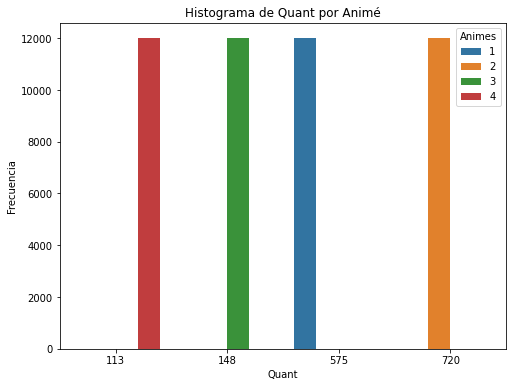

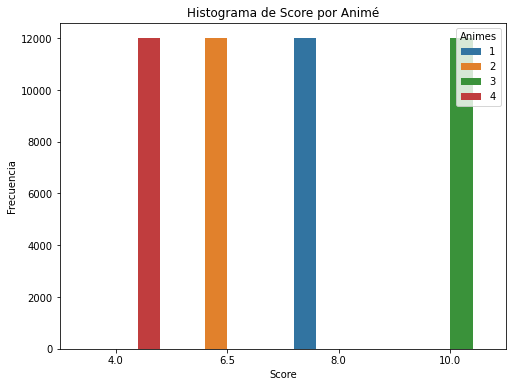

In [7]:
features_constantes = ['Quant','Score']

# Histograma doble
for feature in features_constantes:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature, hue='Animes', data=df)
    plt.title(f'Histograma de {feature} por Animé')
    plt.ylabel('Frecuencia')
    plt.show()

Como no tienen variación, no hay nada que analizar de estas variables.

Podemos repetir este análisis par el resto de los atributos de la base de datos para ver cómo se diferencian según animé para analizar las diferencias entre estos antes de comenzar a analizar por elección:


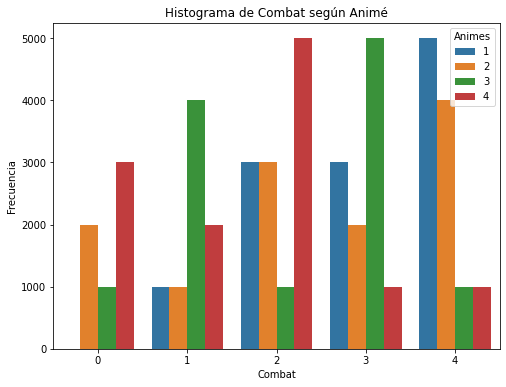

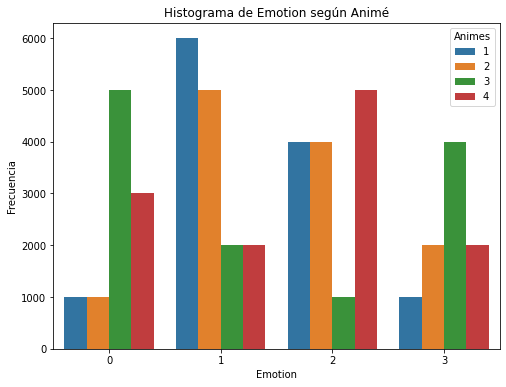

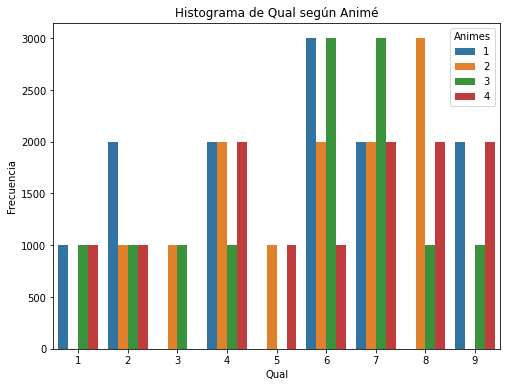

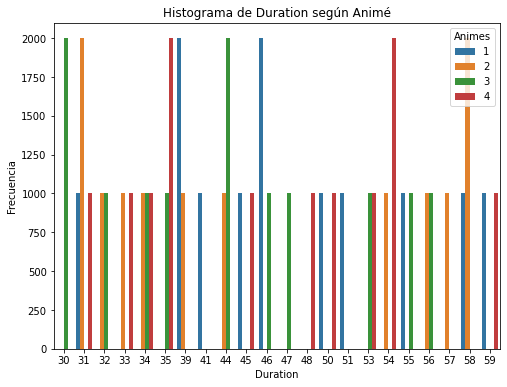

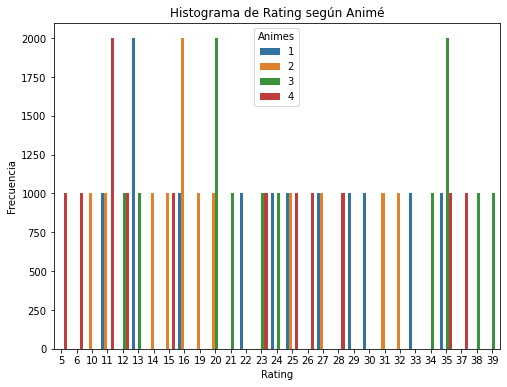

In [8]:
features_capitulos = ['Combat', 'Emotion', 'Qual', 'Duration', 'Rating']

# EDA bivariado
# Histograma múltiple
for feature in features_capitulos:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature, hue='Animes', data=df)
    plt.title(f'Histograma de {feature} según Animé')
    plt.ylabel('Frecuencia')
    plt.show()

Del EDA bivariado, podemos rescatar que:
- El anime 1 es más elegido a medida que aumentan las escenas de combate, y para los otros animes, no se observa un comportamiento  consistente.
- Sobre las escenas emocionantes, aumentarlas, no implica una cantidad mayor de elección, pues en la mayoría de los animes, estos resultan más electos con una cantidad moderada de escenas de este tipo (~1-2)
- Por último, sobre las otras covariables (calidad animación, Rating TV, Duración capítulo, ...) no hay una tendencia o comportamiento que se pueda rescatar en una primera instancia.


Podemos ver cómo se diferencian las características relacionadas directamente con la elección en cada capítulo de la base de datos variando el color entre elegidos y los no elegidos:

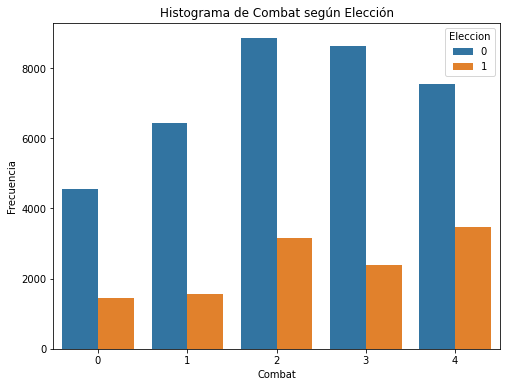

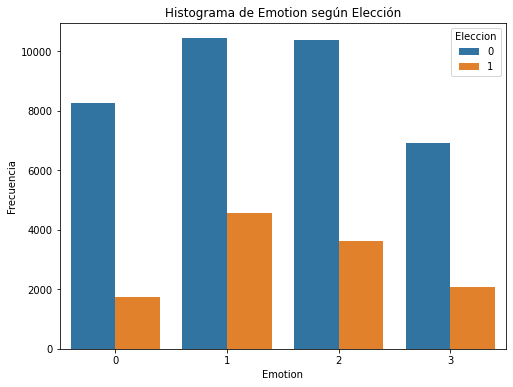

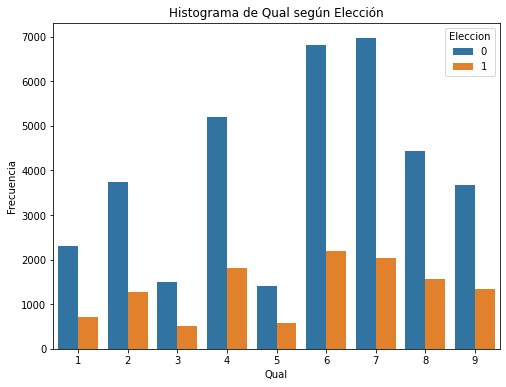

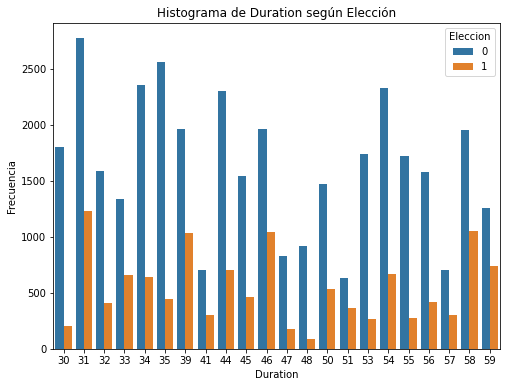

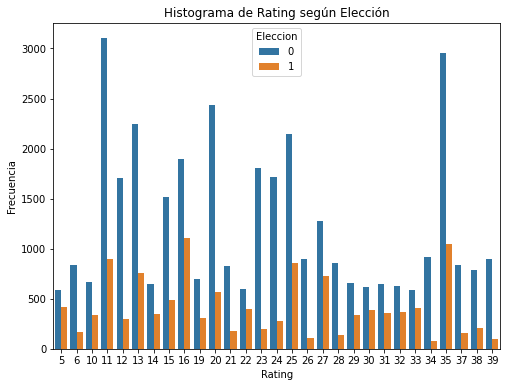

In [9]:
# Histograma múltiple
for feature in features_capitulos:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature, hue='Eleccion', data=df)
    plt.title(f'Histograma de {feature} según Elección')
    plt.ylabel('Frecuencia')
    plt.show()

Sobre el análisis anterior, podemos rescatar el hecho de que hay más cantidad de animes NO elegidos que elegidos. En particular, resulta interesante observar que hombres y mujeres seleccionan o no un anime en cantidades similares, y que si hay un número de escenas de combates cercanas a 2, el anime es mayormente elegido. También observamos que la calidad de animación es en cierta medida valorada pero no fundamental. Por último, el anime más elegido es el 1, y el menos elegido el 4.

Notamos que en las características de Duración y Rating existe mucha variabilidad tanto en los capítulos elegidos como en los que no, por lo que vamos a confirmar los resultados de recién con una separación por Animé, analizando las tendencias centrales de las características anteriores según estos y Elección:

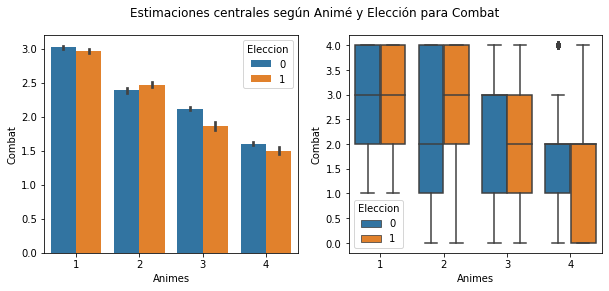

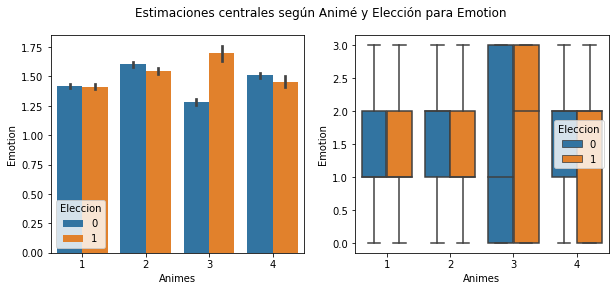

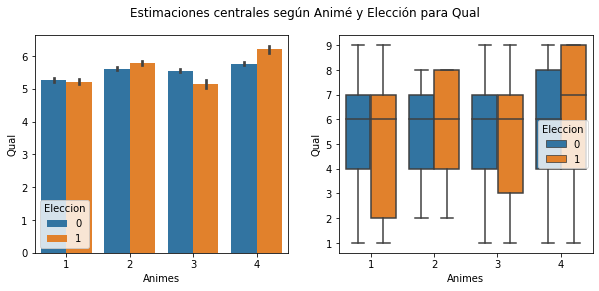

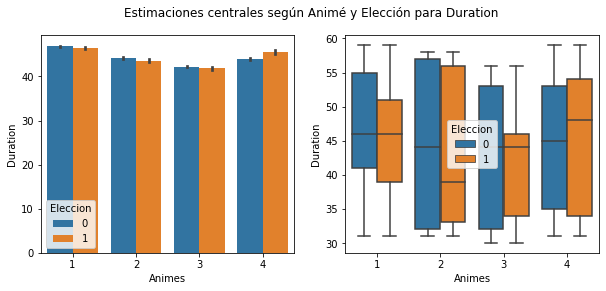

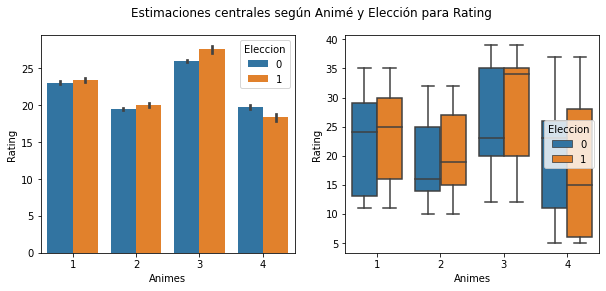

In [10]:
# Histograma múltiple 
for feature in features_capitulos:
    fig, axs = plt.subplots(1, 2, figsize=(10,4))

    fig.suptitle(f'Estimaciones centrales según Animé y Elección para {feature}')

    # Barplot
    sns.barplot(ax=axs[0], x='Animes', y=feature, hue='Eleccion', data=df)

    # Boxplot
    sns.boxplot(ax=axs[1], x='Animes', y=feature, hue='Eleccion', data=df)
    plt.show()

- Vemos que, aunque en bastante baja medida, el Rating pareciera aumentar la probabilidad de elegir un capítulo en los Animés (con una excepción en el 4=BNHA, pero este tiene mucha variabilidad en sus elecciones). 
- Por otro lado, la duración del capítulo pareciera generar el efecto contrario, de nuevo con la misma excepción en BNHA. Sin embargo, este efecto es casi imperceptible en el gráfico, por lo que esta variable podría no estar aportando nada.
- Las escenas de combate parecieran bajar la probabilidad de escoger un capítulo en casi todos menos dragonball (segundo animé).
- Las escenas emocionantes se ven muco más parejas entre las elecciones, pero con un notorio aumento en las escenas emocionantes del tercer animé (naruto).
- En la calidad de animación no parece haber un patrón, pero sí se ven diferencias en elección.

Sin embargo, dadas las mínimas diferencias y que la base de datos contiene información conjunta entre truplas de 4 filas (ya que son excluyentes), entonces no se puede asegurar esto completamente. Lo único claro es que la duración del capítulo no parece tener diferencias en cuanto a la elección.

Para poder ver si obtenemos resultados distintos, podemos incorporar la información de la duración del capítulo a la cantidad de escenas de combate y escenas emocionantes, ya que no es lo mismo tener un capítulo de 20 minutos con 1 escena emocionante a tener uno de 40 minutos con 1 escena emocionante. Dado esto, se hace natural pensar en una tasa de número de escenas en vez de número de escenas por sí solas, por lo que grafiquemos entonce estas dos tasas dividiendo la cantidad de escenas en la duración del capítulo y multiplicando por 30 para tener valores más comunes (ya que un animé suele durar 30 minutos):

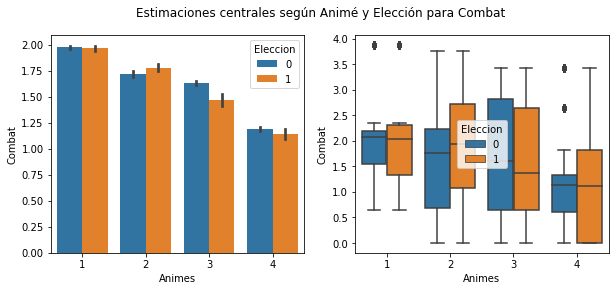

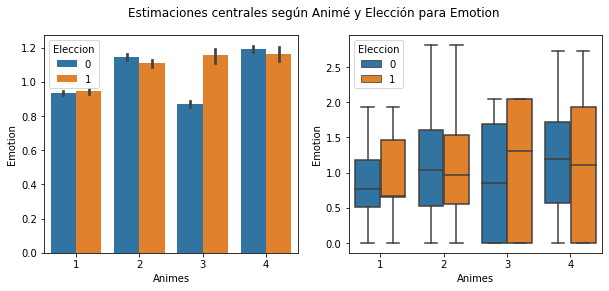

In [11]:
# Histograma múltiple 
for feature in ['Combat', 'Emotion']:
    fig, axs = plt.subplots(1, 2, figsize=(10,4))
    fig.suptitle(f'Estimaciones centrales según Animé y Elección para {feature}')

    # Data
    animes = df['Animes']
    elecciones = df['Eleccion']
    tasa = 30*df[feature]/df['Duration']

    # Barplot
    sns.barplot(ax=axs[0], x=animes, y=tasa, hue=elecciones)
    axs[0].set_ylabel(feature)
    axs[0].set_xlabel('Animes')

    # Boxplot
    sns.boxplot(ax=axs[1], x=animes, y=tasa, hue=elecciones)
    axs[1].set_ylabel(feature)
    axs[1].set_xlabel('Animes')
    plt.show()

El análisis no parece variar demasiado del original, pero sí pareciera haber algo de cambio con esta tranformación a tasa.

Agregamos al análisis ahora el sexo de la persona, sólo con los primeros gráficos de la parte anterior, ya que al set variables enteras sin demasiada variación, el boxplot queda más complicado de analizar:

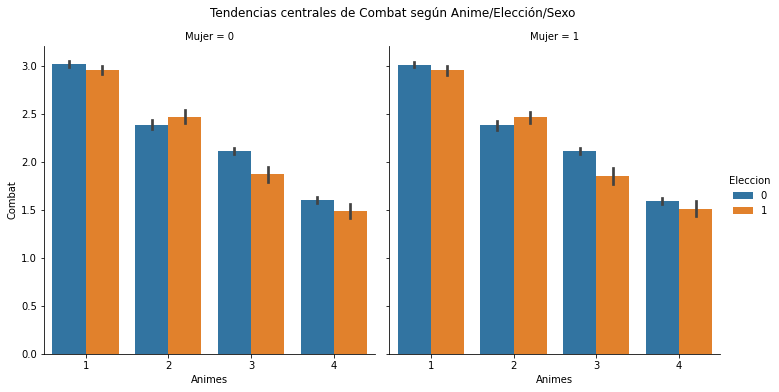

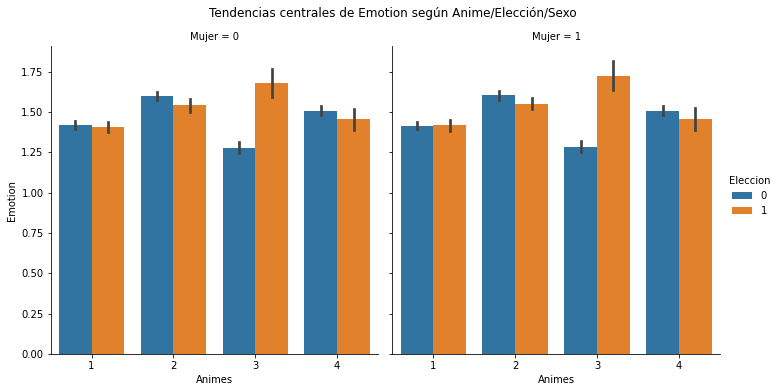

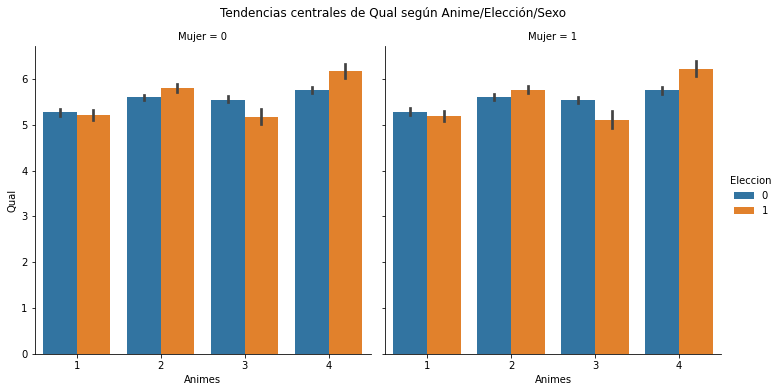

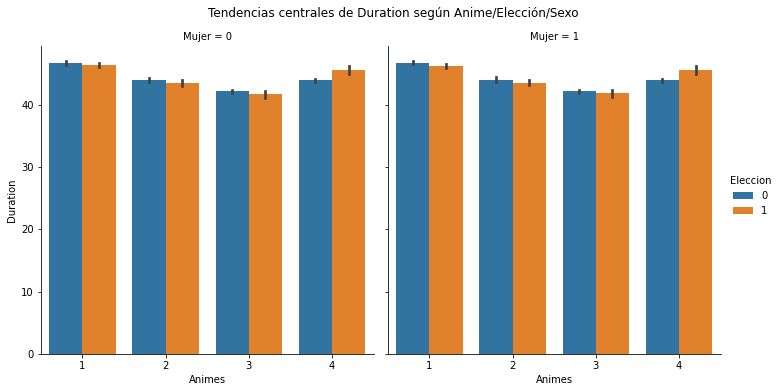

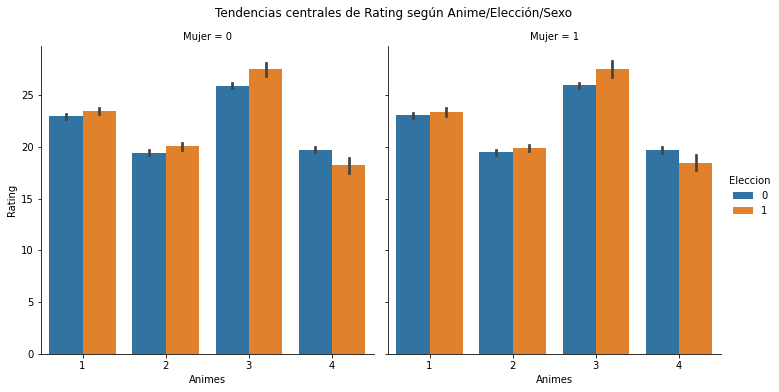

In [12]:
# Histograma múltiple 
for feature in features_capitulos:
    # Barplot 
    sns.catplot(x='Animes', y=feature, hue='Eleccion', col='Mujer', data=df, kind='bar')
    plt.suptitle(f'Tendencias centrales de {feature} según Anime/Elección/Sexo', y=1.04)
    plt.show()

Vemos que no pareciera existir un cambio notorio según sexo en el análisis anterior, por lo que la variable podría no estar aportando mucho.

Intentemos incorporar un análisis ahora con Edad, donde sí haría sentido un boxplot:

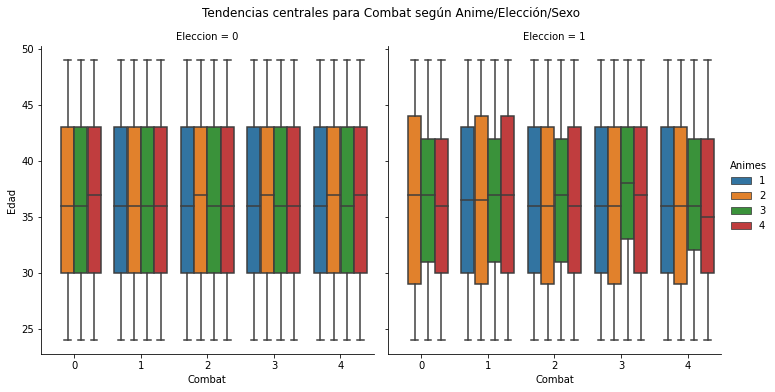

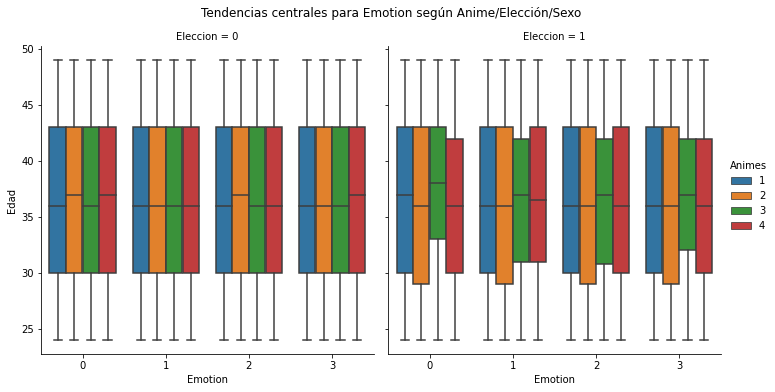

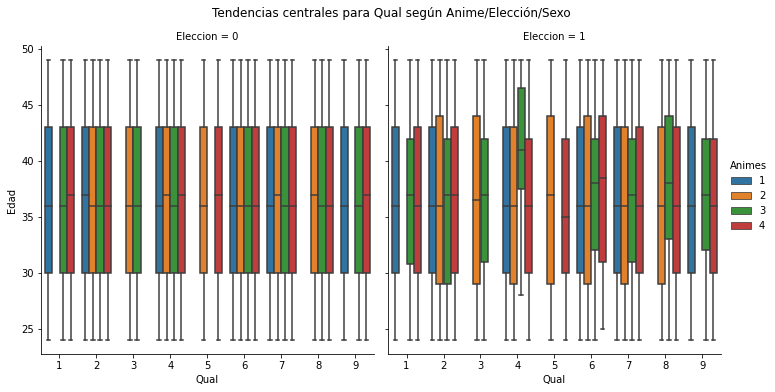

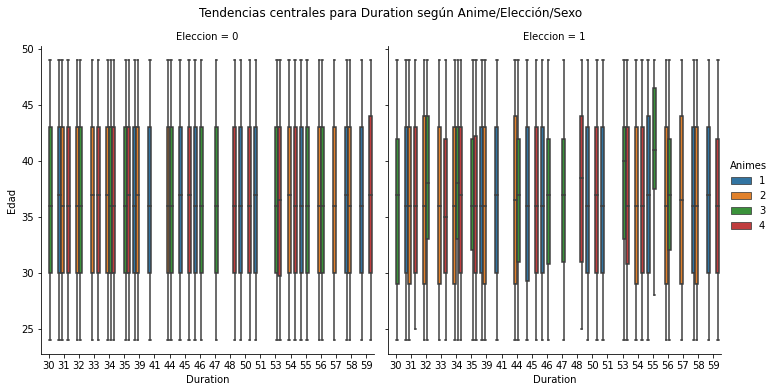

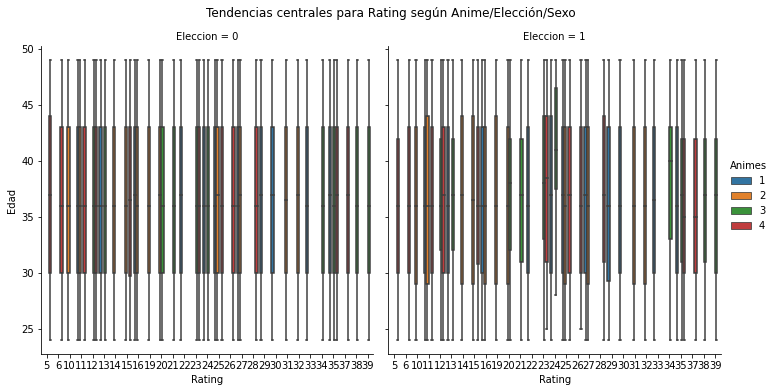

In [13]:
# Histograma múltiple 
for feature in features_capitulos:
    # Barplot 
    sns.catplot(x=feature, y='Edad', hue='Animes', col='Eleccion', data=df, kind='box')
    plt.suptitle(f'Tendencias centrales para {feature} según Anime/Elección/Sexo', y=1.04)
    plt.show()

Vemos que se ve mucha más variabilidad en los gráficos de Elección positiva, lo que puede deberse a que este incorpora 1/4 de los datos que en el caso contrario, por lo que podrían ser resultados no muy representativos en principio. Teniendo esto en cuenta, no pareciera agregar información lo suficientemente interpretable o de interés esta variable.

#### Transformación de la base de datos

Dada esta exclusividad de a tuplas de 4 filas, vamos a tranformar la base de datos a un formato Wide para que cada fila represente sólo una elección de capítulo, incorporando la información de los 4 animés en cada una de ellas.

En primer lugar, notamos que como la cantidad de capítulos y el score de MyAnimeList no son variables entre animés/capítulos/expertos, entonces no agregan ningún valor al análisis que queremos hacer, por lo que podemos obviar estas características de la base de datos a utilizar:

In [14]:
df_animes = df.drop(columns=['Quant', 'Score'])
df_animes.head(2)

Expertos Capitulos Animes  Edad  Mujer  Combat  Emotion  Qual  Duration  \
1.1.1        1         1      1    42      1       3        2     4        41   
1.1.2        1         1      2    42      1       4        1     7        54   

       Rating  Eleccion  
1.1.1      13         0  
1.1.2      27         1

Luego, para resumir la información de la elección en una sola fila, podemos quedarnos con la elección (el animé) como el valor que tendrá la elección:

In [15]:
# La elección la pasamos al valor del animé
df_animes['Eleccion'] = df_animes['Eleccion'].astype('int') * df_animes['Animes'].astype('int') 

# Eliminamos anime que ya es parte de Eleccion
df_animes.drop('Animes', axis=1, inplace=True)

df_animes.head(2)

Expertos Capitulos  Edad  Mujer  Combat  Emotion  Qual  Duration  \
1.1.1        1         1    42      1       3        2     4        41   
1.1.2        1         1    42      1       4        1     7        54   

       Rating  Eleccion  
1.1.1      13         0  
1.1.2      27         2

Ahora, combinamos la información de las tuplas de 4 en 4 en una sola fila. Es decir, para cada nivel de capítulo (podemos entender los capítulos como una variable temporal para hacer la analogía a los casos típicos) vamos a agrupar toda la información de los 4 animés para ese capítulo:

In [16]:
# Tupla
tupla = ['Expertos', 'Capitulos'] # El animé es parte de la eleecion

# Grop by según tupla
gb = df_animes.groupby(tupla)

# Creamos una copia donde vamos a guardar el resultado final
df_animes_wide = df_animes.copy()

# Eliminamos las filas donde no hay eleccion
df_animes_wide = df_animes_wide[df_animes_wide['Eleccion'] > 0].reset_index()

df_animes_wide.head(2)

index Expertos Capitulos  Edad  Mujer  Combat  Emotion  Qual  Duration  \
0  1.1.2        1         1    42      1       4        1     7        54   
1  1.2.3        1         2    42      1       2        3     3        44   

   Rating  Eleccion  
0      27         2  
1      38         3

In [17]:
# Atributos a agrupar en una sola fila por eleccion 
atributos_eleccion = ['Combat', 'Emotion', 'Qual', 'Duration', 'Rating']

# Eliminamos las columnas que vamos a agrupar
df_animes_wide.drop(columns=atributos_eleccion, inplace=True)

# Animes
animes = ['hunterX', 'dragonball', 'naruto', 'bnha']

# Recorro cada anime y veo si calza con el original
for i in range(4):

    # Recorro cada atributo a renombrar
    for atr in atributos_eleccion:

        # Agrego el atributo renombrado al dataframe
        df_animes_wide[f'{atr}.{animes[i]}'] = 0
        df_animes_wide[f'{atr}.{animes[i]}'] = gb.nth(i).reset_index()[atr]

    # Renombramos también la columna de Eleccion
    df_animes_wide.loc[ df_animes_wide['Eleccion'] == i+1, 'Eleccion' ] = animes[i]

# Eliminamos la columna de indice vieja y los indices de la tupla
df_animes_wide.drop(columns=['index', 'Expertos', 'Capitulos'], inplace=True)

# Wide Data
df_animes_wide.head()

Edad  Mujer    Eleccion  Combat.hunterX  Emotion.hunterX  Qual.hunterX  \
0    42      1  dragonball               3                2             4   
1    42      1      naruto               4                1             7   
2    42      1  dragonball               2                1             2   
3    42      1  dragonball               3                1             7   
4    42      1  dragonball               1                1             6   

   Duration.hunterX  Rating.hunterX  Combat.dragonball  Emotion.dragonball  \
0                41              13                  4                   1   
1                59              25                  4                   3   
2                45              29                  2                   2   
3                39              16                  4                   2   
4                46              33                  4                   2   

   ...  Combat.naruto  Emotion.naruto  Qual.naruto  Duration.naruto  \
0  ...              1               0            2               30   
1  ...              2               3            3               44   
2  ...              1               2            1               46   
3  ...              3               0            8               32   
4  ...              3               0            9               56   

   Rating.naruto  Combat.bnha  Emotion.bnha  Qual.bnha  Duration.bnha  \
0             20            2             1          8             53   
1             38            4             2          4             35   
2             35            2             1          6             48   
3             23            2             2          8             54   
4             13            1             2          2             50   

   Rating.bnha  
0           15  
1           37  
2           23  
3            6  
4           12  

[5 rows x 23 columns]

Pasamos la Eleccion a categoría nuevamente:

In [18]:
df_animes_wide['Eleccion'] = df_animes_wide['Eleccion'].astype('category')
df_animes_wide.head(2)

Edad  Mujer    Eleccion  Combat.hunterX  Emotion.hunterX  Qual.hunterX  \
0    42      1  dragonball               3                2             4   
1    42      1      naruto               4                1             7   

   Duration.hunterX  Rating.hunterX  Combat.dragonball  Emotion.dragonball  \
0                41              13                  4                   1   
1                59              25                  4                   3   

   ...  Combat.naruto  Emotion.naruto  Qual.naruto  Duration.naruto  \
0  ...              1               0            2               30   
1  ...              2               3            3               44   

   Rating.naruto  Combat.bnha  Emotion.bnha  Qual.bnha  Duration.bnha  \
0             20            2             1          8             53   
1             38            4             2          4             35   

   Rating.bnha  
0           15  
1           37  

[2 rows x 23 columns]

Tenemos de esta forma nuestra base de datos enformato Wide, con todas las variables incluídas menos las que no tenían variación. Podemos continuar con el EDA con esta nueva base para ver si obtenemos alguna diferencia.

Histogramas por elección y atributo:

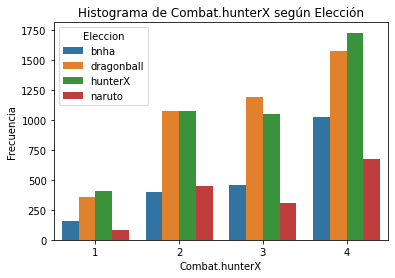

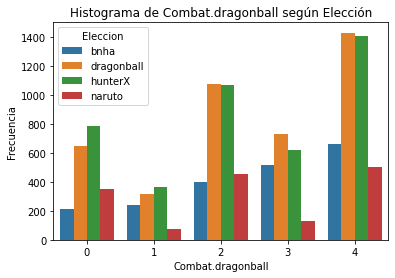

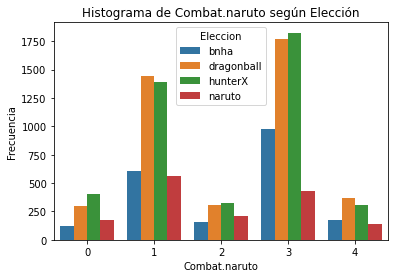

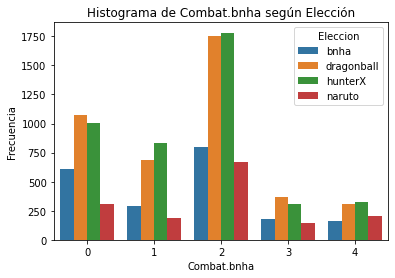

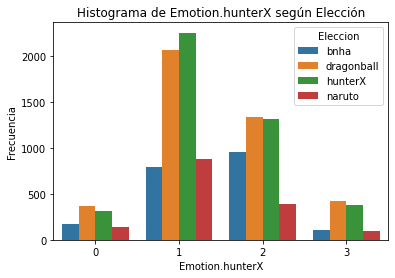

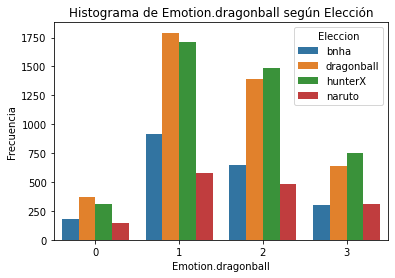

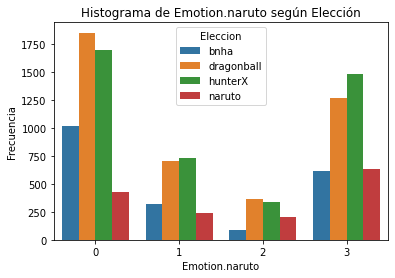

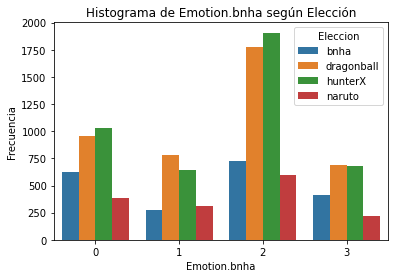

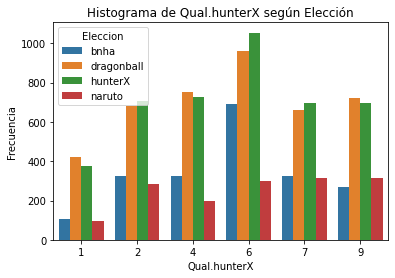

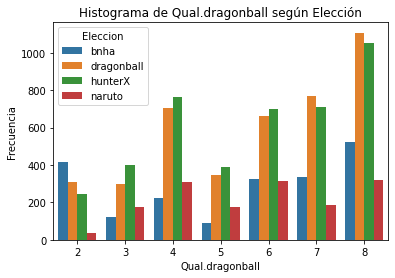

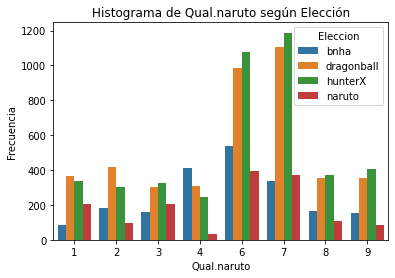

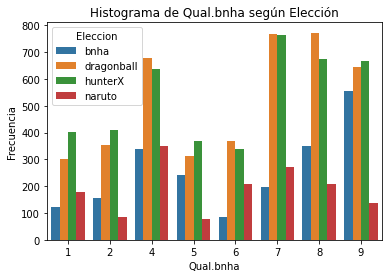

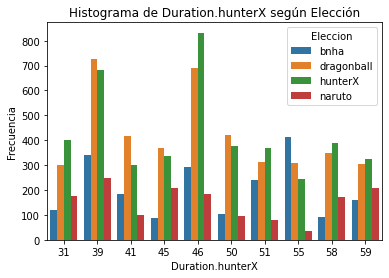

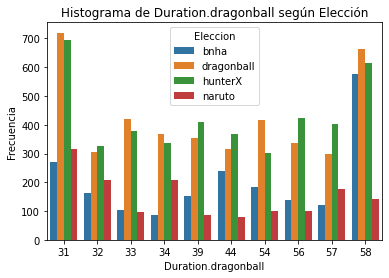

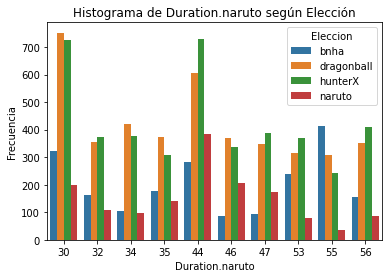

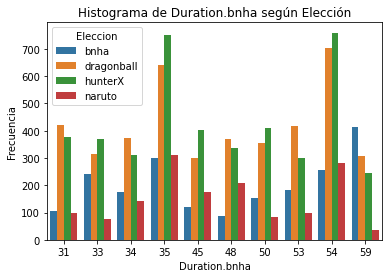

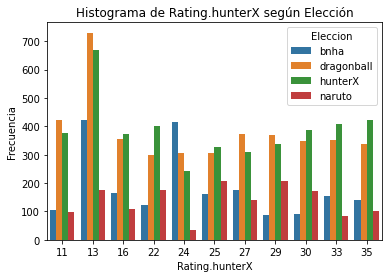

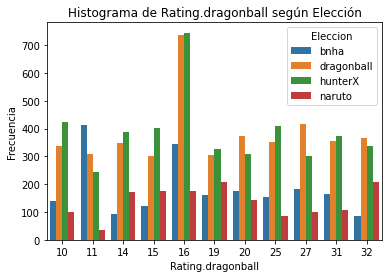

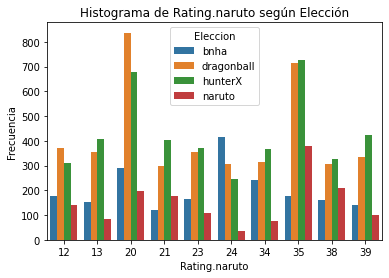

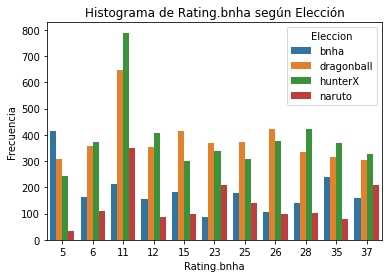

In [19]:
# Histograma múltiple
for feature in features_capitulos:
    for anime in animes:
        plt.figure(figsize=(6,4))
        sns.countplot(x=f'{feature}.{anime}', hue='Eleccion', data=df_animes_wide)
        plt.title(f'Histograma de {feature}.{anime} según Elección')
        plt.ylabel('Frecuencia')
        plt.show()

Vemos que las elecciones las dominan completamente los 2 primeros animés (hunterX y dragonball) en casi todo momento, con lo que sólo con estos resultados podríamos pensar que el animé que se debe emitir debiera ser uno de estos dos, pero aún hay más análisis por realizar.

Veamos si podemos encontrar algún patrón con la edad en esta nueva base:

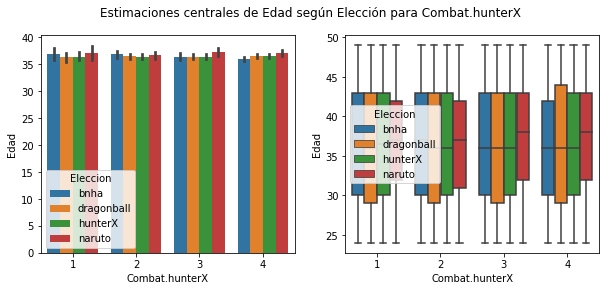

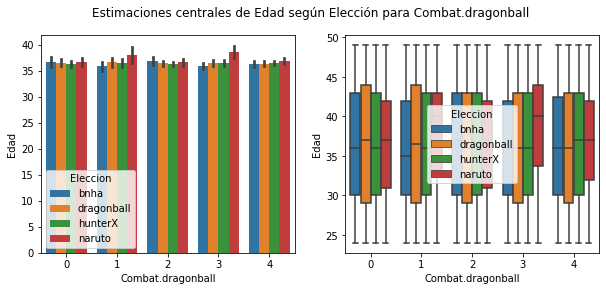

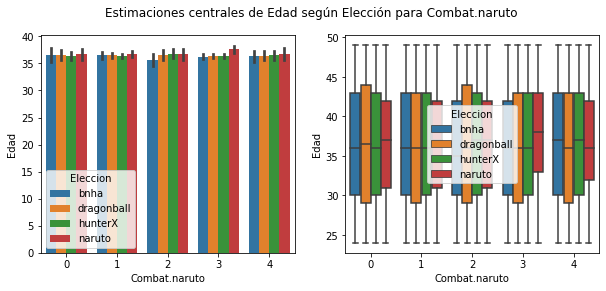

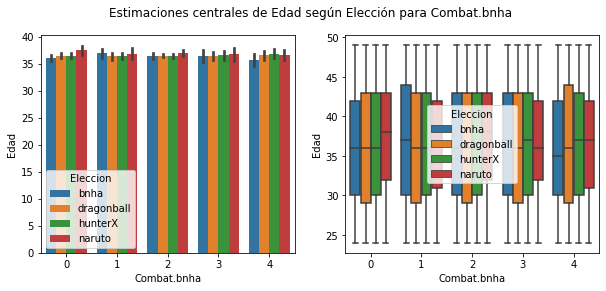

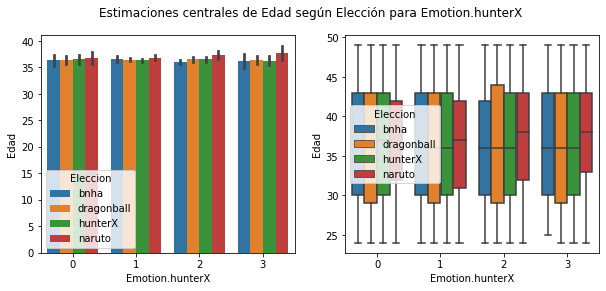

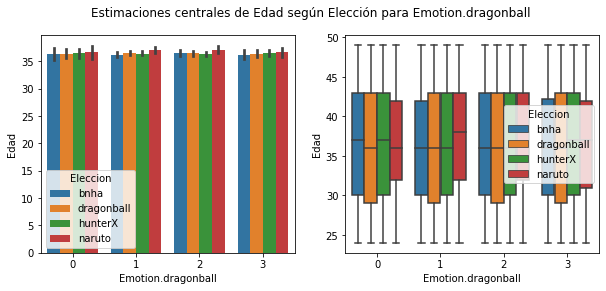

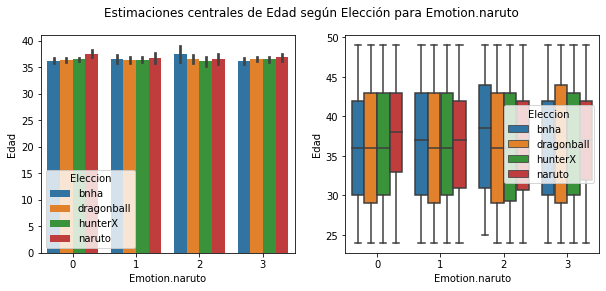

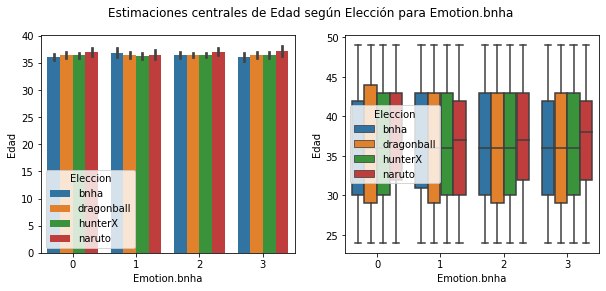

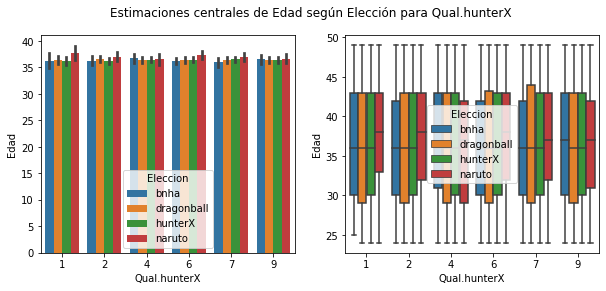

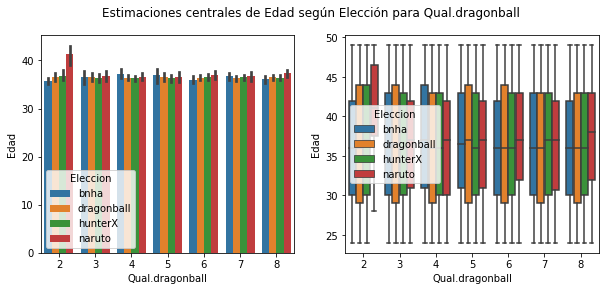

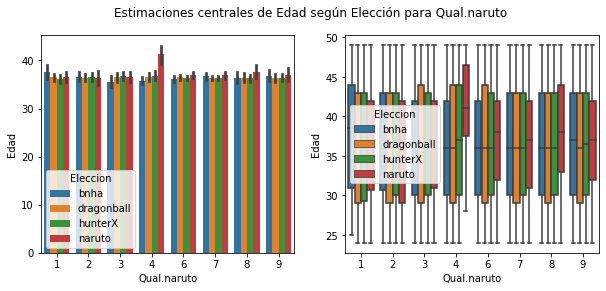

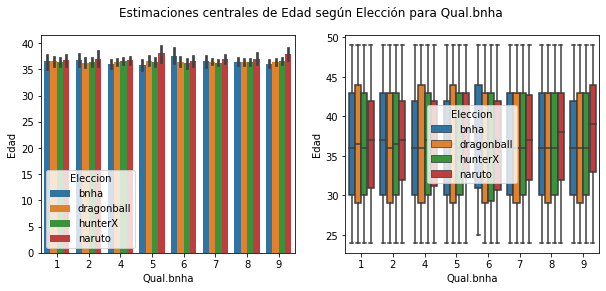

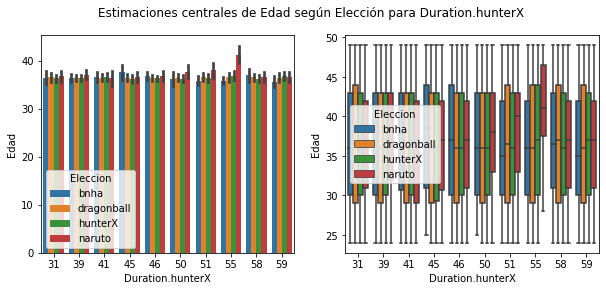

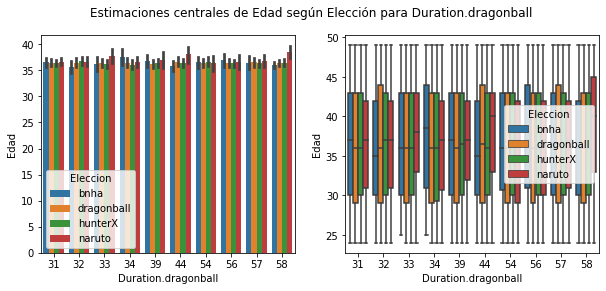

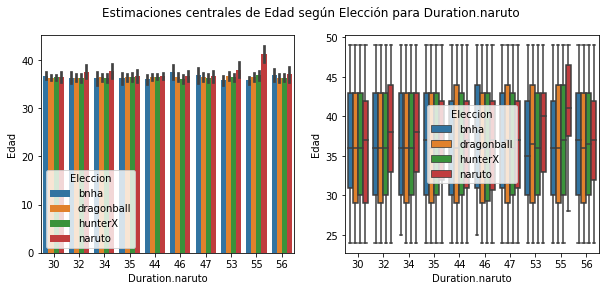

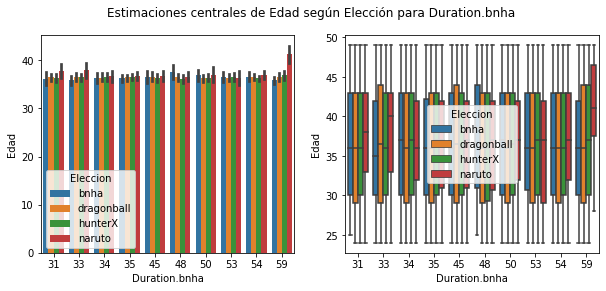

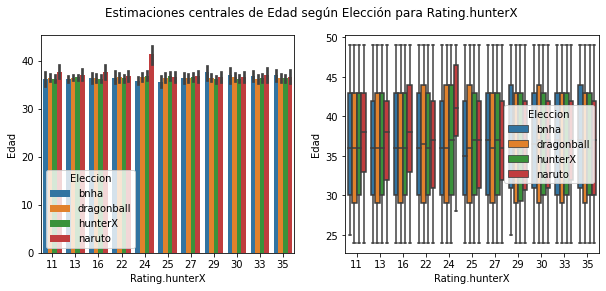

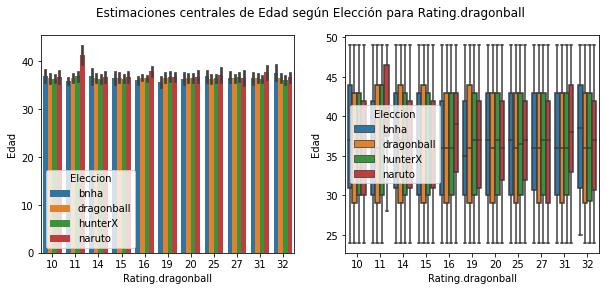

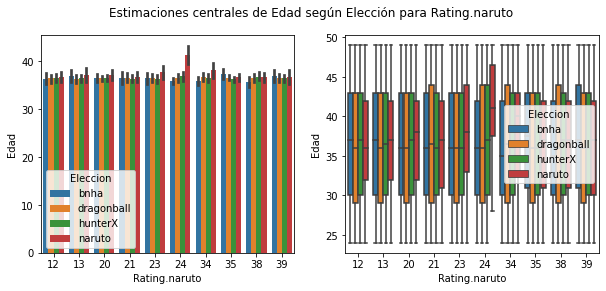

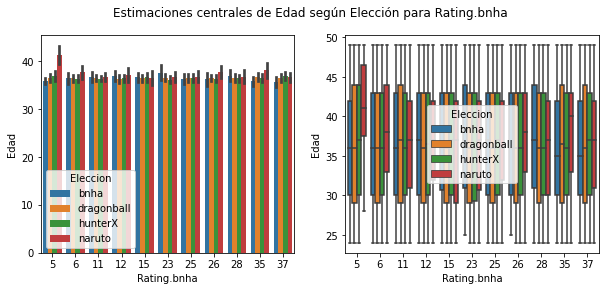

In [20]:
# Histograma múltiple 

for feature in features_capitulos:
    for anime in animes:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))

        fig.suptitle(f'Estimaciones centrales de Edad según Elección para {feature}.{anime}')

        # Barplot
        sns.barplot(ax=axs[0], y='Edad', x=f'{feature}.{anime}', hue='Eleccion', data=df_animes_wide)

        # Boxplot
        sns.boxplot(ax=axs[1], y='Edad', x=f'{feature}.{anime}', hue='Eleccion', data=df_animes_wide)
        plt.show()

No se encuentra alguna característica fácilmente interpretable.

---
### Pregunta 2
(2,0 puntos) Defina un modelo Logit y Mixed Logit multinomiales para estudiar las razones que llevan a un experto a elegir animes. Interprete los coeficientes y calcule la probabilidad de que una mujer de 25 años elija el anime naruto para el modelo logit multinomial.

In [21]:
### Pregunta en R ###

### Pregunta 3
(1,0 puntos) Construya un modelo Probit que capture los elementos de elección principales y comente sobre cómo se interpretan sus coeficientes.

In [22]:
### Pregunta en R ###

### Pregunta 4
(2,0 puntos) Utilizando lo aprendido de los modelos anteriores, construya dos modelos de machine and learning diferentes y compárelos con los modelos logits y probits estimados anteriormente, para ello calcule la matriz de confusión de cada modelo respecto a su predicción y utilice métricas derivadas a partir de esta para la comparación de los modelos.

Cabe destacar que para los moddelos de Machine Learning no necestiamos el formato especial de base de datos que usamos en Logit y Probit. Dado esto, vamos a utilizar la base de datos original, ya que en ella cada atributo de los capitulos será considerado como la misma característica. El único problema con esto es que tenemos elecciones exlcuyentes de 4 en 4 filas (los 4 capítulos en común de los animé) entonces podríamos tener problemas donde se esté prediciendo que se elige el mismo capítulo para más de un animé en cuanto a un experto o que no se escogiera ninguno. Sin embargo, para hacernos cargo de esto, simplemente debemos notar que estos algorítmos entregan una probabilidad o un scoring asociado a cada clase, por lo que para escoger la clase definitiva (la decisión final de cada Experto), bastaría con usar el típico criterio de clasificación multiclase en donde la clase que se asigne a ese capítulo i (entre los 4 capítulos i de los animé) será el que tenga la mayor probabilidad de ser Elegido. Ej: Si el capítulo 1 tiene 0.99 en probabilida para hunterX y 0.95 para dragonball, la decisión fnial será hunterX entre esos 2.

Dividimos entonces la base de datos en set de entrenamiento y de testeo para poder medir la capacidad predictiva en clasificación de nuestros modelos, con un 30% de testeo. Agregamos además todos los atributos de los capítulos y de los individuos, ya que estos modelos no tienen problemas en cuanto a los tiempos de cómputo y puden capturar relaciones que no se ven de manera tan clara con modeos como los de de Logit y Probit:

In [23]:
import pandas as pd 

# Ajustes de la base
X, y = df[['Animes', 'Qual', 'Emotion', 'Combat', 'Edad', 'Mujer', 'Rating', 'Duration']], df['Eleccion']

# Coeficiente fijo por animé
X = pd.get_dummies(X, columns=['Animes'])


#################################
# Split de la base en test/train (Tiene que ser a mano porque van de la mano de 4 en 4)
#################################

# Elección aleatoria de índices
N = df_animes_wide.shape[0]
index = [i for i in range(N)]
np.random.seed(seed=42) #semilla
index_test = np.random.choice(index, int(N*0.3), replace=False)

# Ajuste de 4 en 4 filas
index_test2 = []
for i in index_test:
    index_test2 = index_test2 + [4*i + j for j in range(4)] # las 4 filas asociadas
# index_test = index_test2

# Entrenamiento es el complemento (lo mismo, pero ahora viendo que no esté en test)
index_train = []
for i in range(N):
    if not i in index_test:
        index_train.append(i)

# Ajuste de 4 en 4 filas
index_train2 = []
for i in index_train:
    index_train2 = index_train2 + [4*i + j for j in range(4)] # las 4 filas asociadas

# Train/Test
X_train, y_train = X.iloc[index_train2,:], y.iloc[index_train2]
X_test, y_test   = X.iloc[index_test2,:],  y.iloc[index_test2]

X_test.head(4)

Qual  Emotion  Combat  Edad  Mujer  Rating  Duration  Animes_1  \
162.4.1     7        1       3    24      1      16        39         1   
162.4.2     6        2       4    24      1      31        58         0   
162.4.3     8        0       3    24      1      23        32         0   
162.4.4     8        2       2    24      1       6        54         0   

         Animes_2  Animes_3  Animes_4  
162.4.1         0         0         0  
162.4.2         1         0         0  
162.4.3         0         1         0  
162.4.4         0         0         1

Vemos que se mantuvo el orden de a 4 tal y como queríamos, por lo que está correctamente separada la base de datos.

#### KNN

Por su simpleza, vamos a ocupar KNN como primer modelo. Sin embargo, como es un algoritmo basado en distancias a otras observaciones, si dejamos la base de datos como está vamos a tener que algunos atributos (los con mayores magnitudes) van a pesar más en el algoritmo que los que tienen magnitudes más bajas (como Mujer), por lo que debemos hacer un escalamiento de los datos, lo que puede ser normalizando con el clásico Min-Max o con estandarización y así dejar toda la base de datos en rangos comparables entre atributos. 

Por otro lado, ajustamos los hiperparámetros clásicos de KNN con un cross-validation, seleccionando la combinación que entregue la mayor métrica de ganancia.

Además de lo anterior, para hacer el cálculo de la máxima probabilidad matricialmente (con ayuda del paquete matricial Numpy), vamos a reordenar el vector de Eleccion del set de testeo y de el predicho con KNN en cuatro columnas, donde cada una represente a cada animé y tomamos el argumento que da el valor máximo entre las columnas, lo que nos entrega el índice correspondiente al animé con mayor probabilidad de haber sido escogido.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Escalamiento
from sklearn.metrics import accuracy_score, f1_score # cambiar por funciones directas de matriz 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_validate

# Animes
animes = ['hunterX', 'dragonball', 'naruto', 'bnha']

# Escalamiento de datos
normalizacion = MinMaxScaler()
X_norm_train = normalizacion.fit_transform(X_train)
X_norm_test  = normalizacion.transform(X_test)

########################
# KNN y Cross-Val
########################

# Ajuste de hiperparámetros y con Cross-Validation 

# Número de vecinos (k)
n_neighbors = [5, 11, 17, 21, 25]

# Ponderación de vecinos (al promediar sus pesos en la clasificación)
weights = ['uniform', 'distance']   

# Combinaciones de los parámetros y búsqueda de la mejor
mejor_metrica = -float('inf')
for k in n_neighbors:
    for weight in weights:

        # KNN
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)

        # Cross Validation
        cv_results = cross_validate(knn, X_norm_train, y_train, cv=3) # 3 validaciones en el CV
        
        # Métrica de ganancia
        f1_mean = np.mean(cv_results['test_score'])
        
        # Comparación con actual mejor
        if f1_mean > mejor_metrica:
            mejor_metrica = f1_mean
            mejor_combinacion = {'k':k, 'Ponderación':weight}

# Printeo
print('-'*50)
print('Combinación óptima de hiperparámetros:')
print(mejor_combinacion)
print('-'*50)

# Entrenamos KNN con mejor combinación
knn = KNeighborsClassifier(n_neighbors=mejor_combinacion['k'], weights=mejor_combinacion['Ponderación'])
knn.fit(X_norm_train, y_train)

########################
# Predicción y Ajuste
########################

# Predicción de PROBABILIDADES de Elección 1 (Entrega la probabilidad de ser 0 y de 1, así que tomamos la de 1)
y_pred = knn.predict_proba(X_norm_test)[:,1]

# Predecimos como 1 final la que tenga mayor probabilidad entre los 4 animes (máx probabilidad) 

# Ajuste de 4 columnas para cálculo de argmax
n, m = len(y_pred)//4, 4 # Desiciones, clases
y_etiquetas_pred = np.argmax(y_pred.reshape(n,m), axis=1) # Indice máximo entre columnas
y_etiquetas_pred = [animes[i] for i in y_etiquetas_pred] # Cambiamos los índices por los nombres originales

# Lo mismo para el set de testeo, donde aquí el máximo es el que tiene el valor 1
y_etiquetas_test = np.argmax(y_test.to_numpy().reshape(n,m), axis=1) # Lo mismo en test (max=1)
y_etiquetas_test = [animes[j] for j in y_etiquetas_test] # Cambiamos los índices por los nombres originales


#########################
# Métricas de Evaluación
#########################

# Confusion Matrix y Métricas
conf_M = confusion_matrix(y_etiquetas_test, y_etiquetas_pred)

# Printeo de métricas
print('-'*50)
print('Matriz de Confusión:')
print(conf_M)
print('-'*50)

print('-'*50)
print('Resumen de clasificación y métricas:')
print(classification_report(y_etiquetas_test, y_etiquetas_pred))
print('-'*50)

--------------------------------------------------
Combinación óptima de hiperparámetros:
{'k': 25, 'Ponderación': 'uniform'}
--------------------------------------------------
--------------------------------------------------
Matriz de Confusión:
[[ 84 236 281   6]
 [ 66 539 628  16]
 [ 62 489 744  11]
 [ 12 179 240   7]]
--------------------------------------------------
--------------------------------------------------
Resumen de clasificación y métricas:
              precision    recall  f1-score   support

        bnha       0.38      0.14      0.20       607
  dragonball       0.37      0.43      0.40      1249
     hunterX       0.39      0.57      0.47      1306
      naruto       0.17      0.02      0.03       438

    accuracy                           0.38      3600
   macro avg       0.33      0.29      0.27      3600
weighted avg       0.36      0.38      0.35      3600

--------------------------------------------------


Notemos que para las métricas de evaluación escogimos el F1-Score, ya que es una métrica que se deriva directamente de la matriz de confusión, por ser un promedio armónico entre Recall y Precision, los que se definen de la siguiente manera, donde N representará "Negativo" y P "Positivo", mientras que T "Verdadero" by F "Falso":

$$
 Recall = \frac{TP}{TP+FN}
$$

$$
 Precision = \frac{TP}{TP+FP}
$$

Es decir, el primero nos dice qué tantas de las observaciones asignadas a una clase tenemos en comparación a todas las observaciones de esa clase, mientras que el segundo nos dice cuántos de los que predijimos de una clase realmente son de esa clase. De esta manera, ambas métricas nos dan dos miradas disintas, pero ambas nos interesan para saber si estamos clasificando bien o no. Si tomáramos una métrica que no tiene en consideración, como por ejemplo el Accuracy, nos estaríamos captando esto en bases de datos con clases desbalanceadas, ya que, por ejemplo, si tuviéramos que el 90% de los datos son de una clase y el 10% de otra y un Accuracy dell 91% donde clasifiquemos bien todos los elementos de la clase con el 90% pero muy mal los de la otra, estaríamos concluyendo quizás que 91% es muy buena métrica, pero se debe por completo a la clase con más presencia, por lo que esta métrica no es suficiente. En cambio, con el mismo ejemplo, si consideramos un promedo de F1-Score para cada clase, probablemente obtengamso un valor cercano al 50%, que es lo que realmente está pasando si clasificamos bien sólo una de las clases. Es decir, dado el desbalance que observamos en el EDA en cuanto a la elección de Animés (se elegían más hunterX y dragonball), sería mucho más correcto ocupar la métrica de F1-Score, además de que esta deriva desde la matriz confusión que es lo que piden finalmente.

La manera en que pondera los ratios anteriores el F1-Score es la siguiente:

$$
    F1 = \frac{2\cdot Recall \cdot Precision}{Recall+Precision}
$$

Vemos que se toma con igual peso a ambos ratios descritos con anterioridad. Dado esto, sólo queda mencionar que al tener un F1 por cada clase, entonces para el caso de multiclase se debe tomar el promedio el F1-Score (avg), el que se puede tomar tanto de manera uniforme como de manera ponderada (weighted) por la cantidad de etiquetas de esa clase, por lo que analizamos ambos casos en el resultado anterior (resumen de f1). Obtuvimos 27% y 35% respectivamente en ambos promedios, por lo que podemos decir que el rendimiento de nuestro modelo no es muy bueno, pero aún debemos comparar este resultado con los otros modelos, además de que se clasifica mucho mejor para hunterX y dragonball que para los otros dos (naruto se clasifica muy mal).

#### Support Vector Machine 

Para tener un segundo punto de comparación tanto con el KNN como con los modelos Loguit y Probit de la pregunta anterior, utilizamos Support Vector Machine (Classifier) de la misma manera que con KNN, ya que también podemos obtener la probabilida de pertenecer a una clase con este método. En este caso tenemos un plano separador entre las clases (al comparar 1 a 1 o 1 vs todo), por lo que los hiperparámetros a mover son la función que aplicamos a el plano afín clásico por si existen relaciones no tan claras separables con un hiperplano clásico. El resto del precedimiento es análogo en cuanto a la programación, normalización y todo con los mismos set de entrenamiento y testeo:

In [30]:
from sklearn.ensemble import RandomForestClassifier

########################
# RF y Cross-Val
########################

# Ajuste de hiperparámetros y con Cross-Validation 

# Número de árboles
n_trees = [100, 200, 500]

# Máximo de atributos a ver al hacer el corte
max_features = ['auto', 'sqrt', 'log2']

# Combinaciones de los parámetros y búsqueda de la mejor
mejor_metrica = -float('inf')
for n_estimators in n_trees:
    for max_feat in max_features:

        # RF
        rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_feat)

        # Cross Validation
        cv_results = cross_validate(rf, X_norm_train, y_train, cv=3) # 3 validaciones en el CV
        
        # Métrica de ganancia
        f1_mean = np.mean(cv_results['test_score'])
        
        # Comparación con actual mejor
        if f1_mean > mejor_metrica:
            mejor_metrica = f1_mean
            mejor_combinacion = {'n_trees':n_estimators, 'max_feat':max_feat}

# Printeo
print('-'*50)
print('Combinación óptima de hiperparámetros:')
print(mejor_combinacion)
print('-'*50)

# Entrenamos KNN con mejor combinación
rf = RandomForestClassifier(n_estimators=mejor_combinacion['n_trees'], max_features=mejor_combinacion['max_feat'])
rf.fit(X_norm_train, y_train)

########################
# Predicción y Ajuste
########################

# Predicción de PROBABILIDADES de Elección 1 (Entrega la probabilidad de ser 0 y de 1, así que tomamos la de 1)
y_pred = rf.predict_proba(X_norm_test)[:,1]

# Predecimos como 1 final la que tenga mayor probabilidad entre los 4 animes (máx probabilidad) 

# Ajuste de 4 columnas para cálculo de argmax
y_etiquetas_pred = np.argmax(y_pred.reshape(n,m), axis=1) # Indice máximo entre columnas
y_etiquetas_pred = [animes[i] for i in y_etiquetas_pred] # Cambiamos los índices por los nombres originales


#########################
# Métricas de Evaluación
#########################

# Confusion Matrix y Métricas
conf_M = confusion_matrix(y_etiquetas_test, y_etiquetas_pred)

# Printeo de métricas
print('-'*50)
print('Matriz de Confusión:')
print(conf_M)
print('-'*50)

print('-'*50)
print('Resumen de clasificación y métricas:')
print(classification_report(y_etiquetas_test, y_etiquetas_pred))
print('-'*50)

--------------------------------------------------
Combinación óptima de hiperparámetros:
{'n_trees': 500, 'max_feat': 'auto'}
--------------------------------------------------
--------------------------------------------------
Matriz de Confusión:
[[ 84 254 253  16]
 [ 81 552 571  45]
 [ 83 520 655  48]
 [ 17 199 194  28]]
--------------------------------------------------
--------------------------------------------------
Resumen de clasificación y métricas:
              precision    recall  f1-score   support

        bnha       0.32      0.14      0.19       607
  dragonball       0.36      0.44      0.40      1249
     hunterX       0.39      0.50      0.44      1306
      naruto       0.20      0.06      0.10       438

    accuracy                           0.37      3600
   macro avg       0.32      0.29      0.28      3600
weighted avg       0.35      0.37      0.34      3600

--------------------------------------------------


En este modelo obtenemos 34% y 28% en el F1-Score, lo que es un poco más bajo que con KNN, pero podemos notar que mejora la clasificación de la clase con menos elecciones (naruto), por lo que este modelo da peor en promedio, pero el resto de las clases da sólo un poco peor en comparación a los valores anteriores, por lo que en realidad podríamos considerar que da un igual o incluso mejor de manera aislada, no así de manera agregada. 

#### Logit y Mixed Logit

Para poder comparar estos resultados con los resultados de Logit y Probit que se corrieron en R, debemos importar los resultados en la predicción en el mismo set de testeo para cada uno. 



In [46]:
y_test_logit  = pd.read_csv('./Dataset/Anime2_y_test.csv', index_col=0)['Eleccion']
y_train_logit = pd.read_csv('./Dataset/Anime2_y_train.csv', index_col=0)['Eleccion']
y_test_logit  = pd.read_csv('./Dataset/Anime2_y_test.csv', index_col=0)['Eleccion']
y_train_logit = pd.read_csv('./Dataset/Anime2_y_train.csv', index_col=0)['Eleccion']

1935    dragonball
6494       hunterX
1720          bnha
9120          bnha
360         naruto
           ...    
9136       hunterX
9169    dragonball
9419    dragonball
3817    dragonball
6345       hunterX
Name: Eleccion, Length: 3600, dtype: object

In [61]:
# len(y_etiquetas_test)
y_etiquetas_test = pd.Series(y_etiquetas_test)
y_etiquetas_test.to_csv('./Dataset/Anime2_y_test.csv')


In [58]:
len(y_test_logit)

3600

In [52]:
3600*4

14400

Expertos Capitulos Animes  Edad  Mujer  Quant  Score  Combat  Emotion  \
1.2.1        1         2      1    42      1    575    8.0       4        1   
1.2.2        1         2      2    42      1    720    6.5       4        3   
1.2.3        1         2      3    42      1    148   10.0       2        3   
1.2.4        1         2      4    42      1    113    4.0       4        2   
1.3.1        1         3      1    42      1    575    8.0       2        1   
1.3.2        1         3      2    42      1    720    6.5       2        2   
1.3.3        1         3      3    42      1    148   10.0       1        2   
1.3.4        1         3      4    42      1    113    4.0       2        1   

       Qual  Duration  Rating  Eleccion  
1.2.1     7        59      25         0  
1.2.2     6        32      19         0  
1.2.3     3        44      38         1  
1.2.4     4        35      37         0  
1.3.1     2        45      29         0  
1.3.2     4        34      32         1  
1.3.3     1        46      35         0  
1.3.4     6        48      23         0

In [81]:
for i in index_test:
    if i in index_train:
        print(i)

### Pregunta 5
(1,0 puntos) Resuma sus aprendizajes principales en un máximo de 4 tablas o figuras. Redacte de manera concisa sus resultados tal como los reportaría al departamento comercial interesado en informarse de la preferencia de los expertos. Agregue cualquier conclusión o idea que le parezca relevante de comunicar para que los representantes del canal de televisión tomen la mejor estrategia de programación televisiva.

Algo que se me ocurre poner acá, independiente del resultado, es la predominancia de hunterX y dragonball. Por otro lado, ver qué edades predecimos mejor, porque quizás con público objetivo. Quizás apoyar esto último con algún dato de edades de personas que ven tele ![como esto](https://www.emol.com/noticias/Espectaculos/2019/04/04/943527/Estudio-anual-de-CNTV-establece-que-el-consumo-de-television-bajo-94-horas-en-el-ultimo-ano.html#:~:text=Con%20respecto%20al%20consumo%20diario,ven%2054%20minutos%20a%20diario.) combinado con otro de rango de edades que ven animé, ya que estos dos impactan en el rating.